# Q6 a

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_excel("ttm.xls")
data

,DATE,TIME_M,EX,SYM,SIZE,PRICE
0,20200930,09:35:00.624000,D,TTM,100,9.075
1,20200930,09:35:01.146000,K,TTM,100,9.080
2,20200930,09:35:01.146000,P,TTM,400,9.080
3,20200930,09:35:01.146000,K,TTM,100,9.080
4,20200930,09:35:01.146000,T,TTM,100,9.080
...,...,...,...,...,...,...
5853,20200930,15:59:58.097000,N,TTM,192,9.090
5854,20200930,15:59:58.598000,N,TTM,800,9.090
5855,20200930,15:59:58.599000,N,TTM,100,9.100
5856,20200930,15:59:59.977000,Z,TTM,59,9.090


# Q6 a

First few simple returns:
    PRICE   returns
0  9.0750       NaN
1  9.0800  0.000551
2  9.0800  0.000000
3  9.0800  0.000000
4  9.0800  0.000000
5  9.0850  0.000551
6  9.0800 -0.000550
7  9.0785 -0.000165
8  9.0800  0.000165
9  9.0800  0.000000


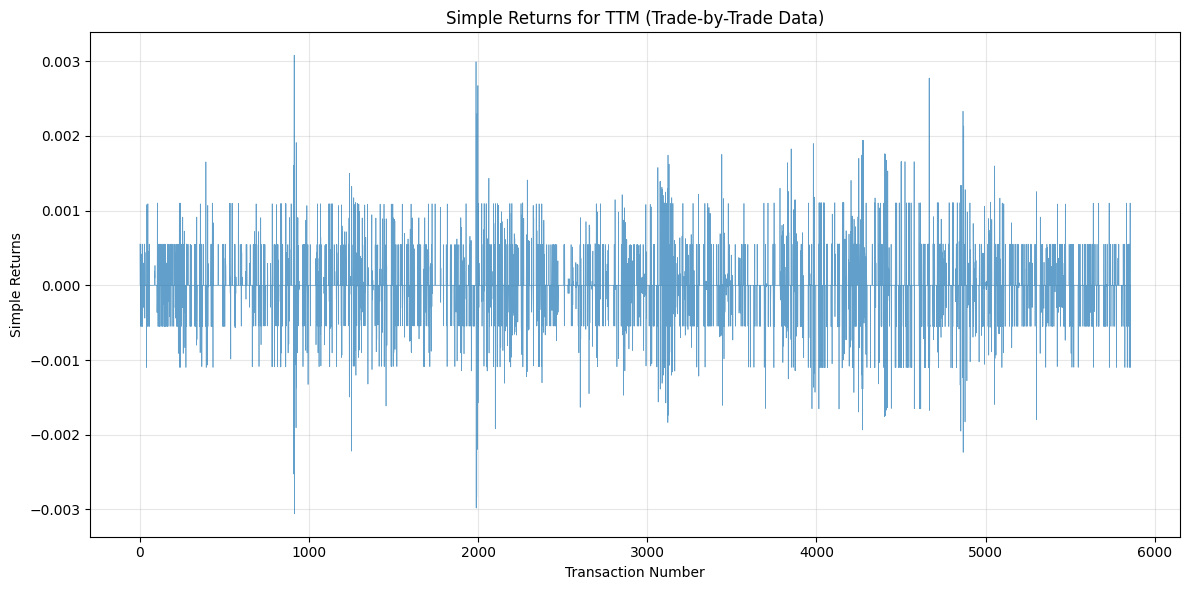


Summary Statistics of Simple Returns:
count    5.857000e+03
mean     3.821370e-07
std      4.476131e-04
min     -3.057671e-03
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.077998e-03
Name: returns, dtype: float64


In [3]:
data['returns'] = data['PRICE'].pct_change()

# Display first few returns
print("First few simple returns:")
print(data[['PRICE', 'returns']].head(10))

# Plot the simple returns
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['returns'], linewidth=0.5, alpha=0.7)
plt.xlabel('Transaction Number')
plt.ylabel('Simple Returns')
plt.title('Simple Returns for TTM (Trade-by-Trade Data)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print('\nSummary Statistics of Simple Returns:')
print(data['returns'].describe())

# Q6 b

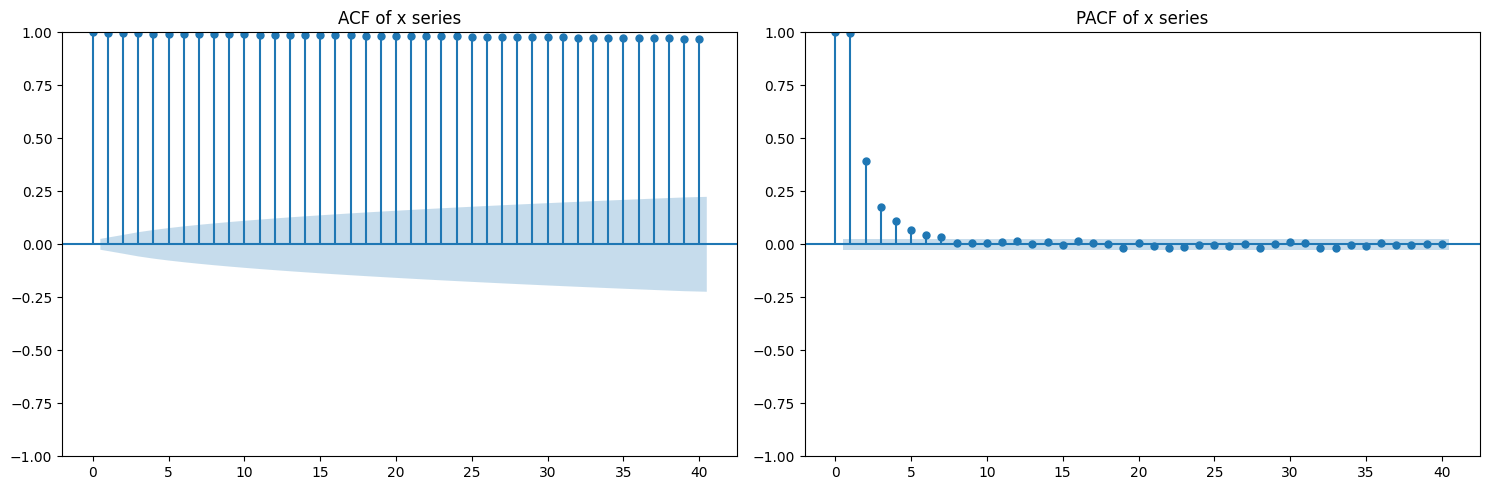

step: 1 acf: 0.9961717799402762 pacf: 0.9963418621973945
step: 2 acf: 0.9953705370915477 pacf: 0.4126281758879973
step: 3 acf: 0.9944989501687991 pacf: 0.19423665301452583
step: 4 acf: 0.9938196187168253 pacf: 0.1276004296399162
step: 5 acf: 0.9931468674874439 pacf: 0.08250739674523584
step: 6 acf: 0.9924979446984863 pacf: 0.05575497800254685
step: 7 acf: 0.9919040334313173 pacf: 0.04672722178387716
step: 8 acf: 0.9912011073921935 pacf: 0.015471644408653742
step: 9 acf: 0.9905259874390907 pacf: 0.008707677007078864
step: 10 acf: 0.9898663484798721 pacf: 0.008433044827809662
step: 11 acf: 0.9892422711279011 pacf: 0.012041312034760835
step: 12 acf: 0.9886612950236257 pacf: 0.018070324876528095
step: 13 acf: 0.9879995948303795 pacf: 0.0017990473555374023
step: 14 acf: 0.9874331454405083 pacf: 0.013980306957293995
step: 15 acf: 0.9867849399767373 pacf: 0.0010489497930592233
step: 16 acf: 0.9862527780818459 pacf: 0.01728704421162438
step: 17 acf: 0.9856530707629169 pacf: 0.00711827435349301

In [4]:
# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(data["PRICE"], lags=40, ax=axes[0], title="ACF of x series")
plot_pacf(data["PRICE"], lags=40, ax=axes[1], title="PACF of x series")

acf_values = acf(data["PRICE"], nlags=48, fft=False)
pacf_values = pacf(data["PRICE"], nlags=48)

plt.tight_layout()
plt.show()

for x in range(1, 25):
    print("step:" , x , "acf:" , acf_values[x] , "pacf:" , pacf_values[x])

An AR(1) looks to be a good solution here from first glance

# Q6 c / d

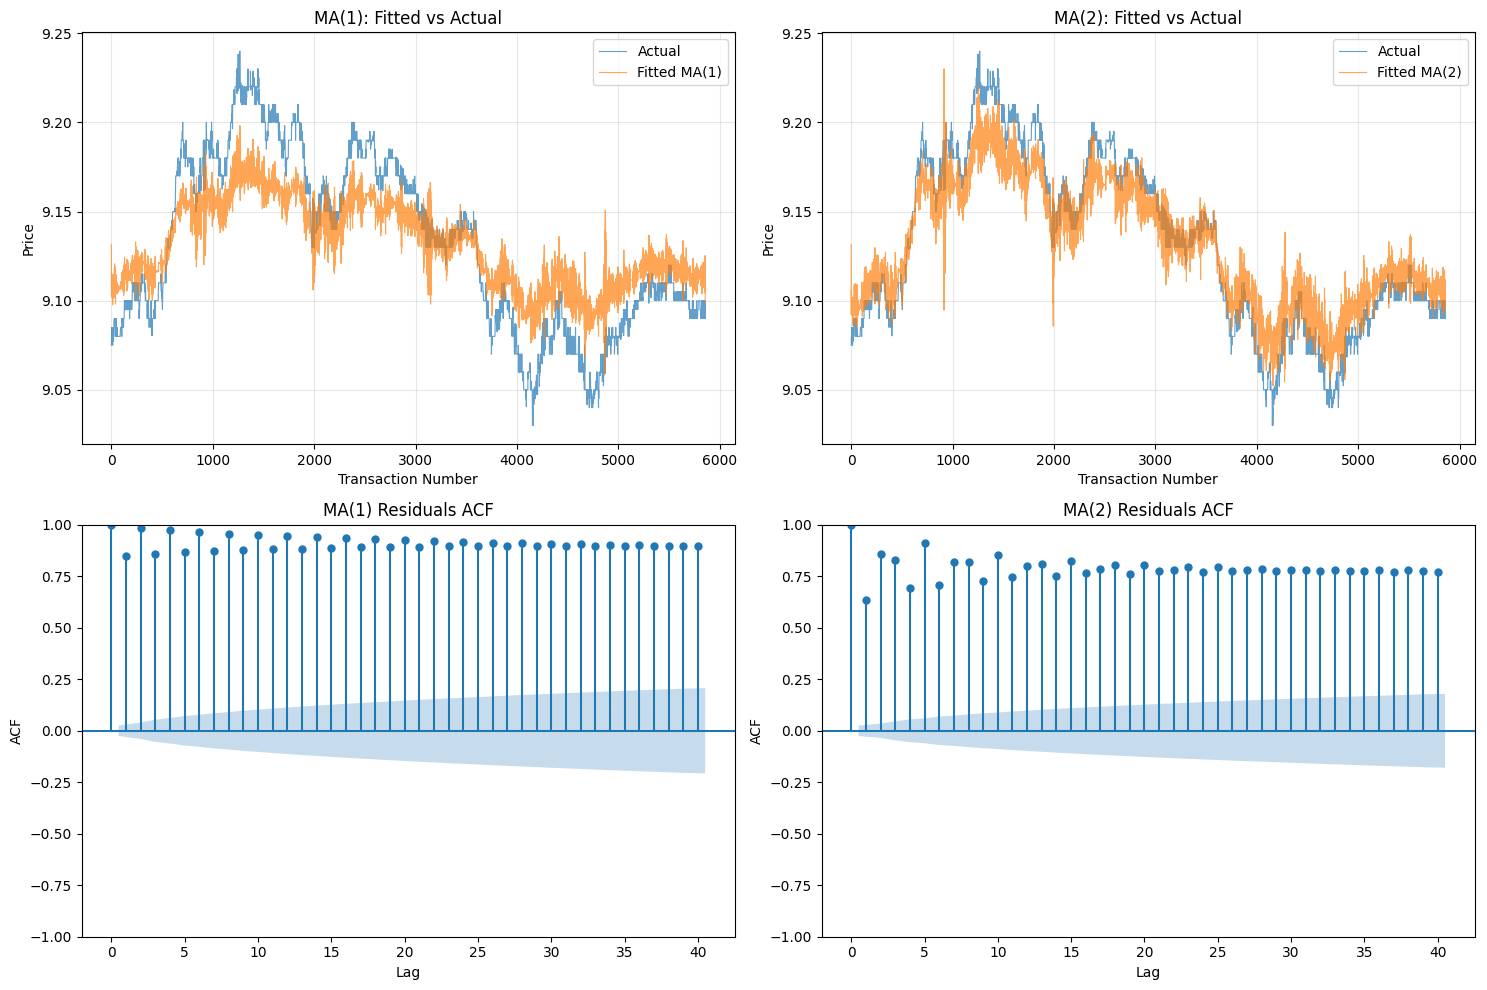

AR(1) Model Summary
0.8490325384822232
0.9868362837320022
0.8579185604683519
0.9754691685442798
0.8658718535414787
0.9657482709369389

AR(2) Model Summary
0.6362627547410031
0.8606146780666564
0.8286780009123039
0.6925782885944127
0.9095958558536977
0.7083953972142951


In [9]:
# Fit MA(1) and MA(2) models to PRICE data
# MA(1) = ARIMA(0,0,1), MA(2) = ARIMA(0,0,2)

price_data = data['PRICE'].dropna()

# Fit MA models
ma1_model = ARIMA(price_data, order=(0, 0, 1)).fit()
ma2_model = ARIMA(price_data, order=(0, 0, 2)).fit()

# Get fitted values and residuals
ma1_fitted = ma1_model.fittedvalues
ma1_resid = ma1_model.resid

ma2_fitted = ma2_model.fittedvalues
ma2_resid = ma2_model.resid

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Top row: Fitted vs Actual plots
axes[0, 0].plot(price_data.index, price_data.values, label='Actual', alpha=0.7, linewidth=0.8)
axes[0, 0].plot(ma1_fitted.index, ma1_fitted.values, label='Fitted MA(1)', alpha=0.7, linewidth=0.8)
axes[0, 0].set_title('MA(1): Fitted vs Actual')
axes[0, 0].set_xlabel('Transaction Number')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(price_data.index, price_data.values, label='Actual', alpha=0.7, linewidth=0.8)
axes[0, 1].plot(ma2_fitted.index, ma2_fitted.values, label='Fitted MA(2)', alpha=0.7, linewidth=0.8)
axes[0, 1].set_title('MA(2): Fitted vs Actual')
axes[0, 1].set_xlabel('Transaction Number')
axes[0, 1].set_ylabel('Price')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Bottom row: ACF of residuals
plot_acf(ma1_resid, lags=40, ax=axes[1, 0], title='MA(1) Residuals ACF')
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('ACF')

plot_acf(ma2_resid, lags=40, ax=axes[1, 1], title='MA(2) Residuals ACF')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('ACF')

plt.tight_layout()
plt.show()

# Print model summaries
print("=" * 60)
print("AR(1) Model Summary")
print("=" * 60)
residuals_acf = acf(ma1_resid, nlags=48, fft=False)
for x in range(1, 7):
    print(residuals_acf[x])

print("\n" + "=" * 60)
print("AR(2) Model Summary")
print("=" * 60)
residuals_acf = acf(ma2_resid, nlags=48, fft=False)
for x in range(1, 7):
    print(residuals_acf[x])

Both models do not pass the residual diagnostic evident by the high ACF on both plots.

# Q6 e

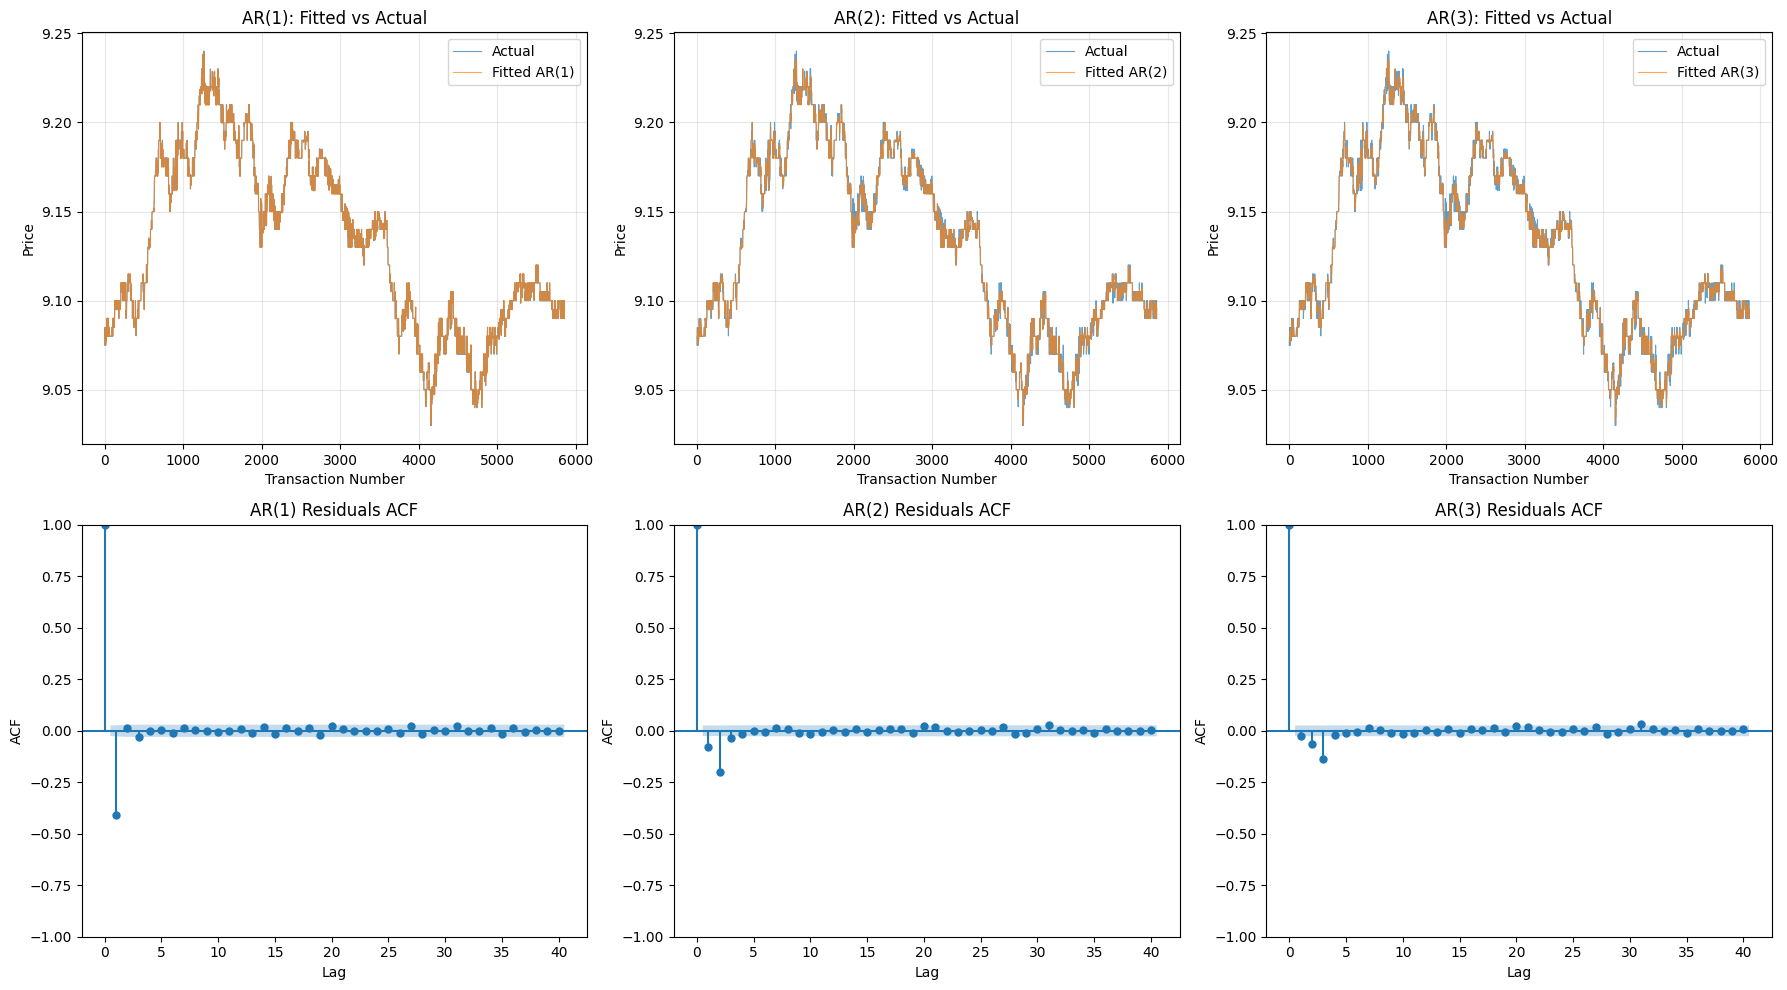

AR(1) ACF
-0.4097787397778704
0.01568378295788371
-0.02874036767037207
0.0009233688241578114

AR(2) ACF
-0.0772729187738416
-0.19943220006614987
-0.035930679562172566
-0.015140977896588012

AR(3) ACF
-0.02372310767711535
-0.06484290287820492
-0.13517056443594583
-0.02139026092892545


In [11]:
# Fit AR(1), AR(2), and AR(3) models to PRICE data
from statsmodels.tsa.ar_model import AutoReg

# Remove any NaN values for modeling
price_data = data['PRICE'].dropna()

# Fit AR models
ar1_model = AutoReg(price_data, lags=1, trend='c').fit()
ar2_model = AutoReg(price_data, lags=2, trend='c').fit()
ar3_model = AutoReg(price_data, lags=3, trend='c').fit()

# Get fitted values and residuals
ar1_fitted = ar1_model.fittedvalues
ar1_resid = ar1_model.resid

ar2_fitted = ar2_model.fittedvalues
ar2_resid = ar2_model.resid

ar3_fitted = ar3_model.fittedvalues
ar3_resid = ar3_model.resid

# Create 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Top row: Fitted vs Actual plots
axes[0, 0].plot(price_data.index, price_data.values, label='Actual', alpha=0.7, linewidth=0.8)
axes[0, 0].plot(ar1_fitted.index, ar1_fitted.values, label='Fitted AR(1)', alpha=0.7, linewidth=0.8)
axes[0, 0].set_title('AR(1): Fitted vs Actual')
axes[0, 0].set_xlabel('Transaction Number')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(price_data.index, price_data.values, label='Actual', alpha=0.7, linewidth=0.8)
axes[0, 1].plot(ar2_fitted.index, ar2_fitted.values, label='Fitted AR(2)', alpha=0.7, linewidth=0.8)
axes[0, 1].set_title('AR(2): Fitted vs Actual')
axes[0, 1].set_xlabel('Transaction Number')
axes[0, 1].set_ylabel('Price')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[0, 2].plot(price_data.index, price_data.values, label='Actual', alpha=0.7, linewidth=0.8)
axes[0, 2].plot(ar3_fitted.index, ar3_fitted.values, label='Fitted AR(3)', alpha=0.7, linewidth=0.8)
axes[0, 2].set_title('AR(3): Fitted vs Actual')
axes[0, 2].set_xlabel('Transaction Number')
axes[0, 2].set_ylabel('Price')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Bottom row: ACF of residuals
plot_acf(ar1_resid, lags=40, ax=axes[1, 0], title='AR(1) Residuals ACF')
axes[1, 0].set_xlabel('Lag')
axes[1, 0].set_ylabel('ACF')

plot_acf(ar2_resid, lags=40, ax=axes[1, 1], title='AR(2) Residuals ACF')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('ACF')

plot_acf(ar3_resid, lags=40, ax=axes[1, 2], title='AR(3) Residuals ACF')
axes[1, 2].set_xlabel('Lag')
axes[1, 2].set_ylabel('ACF')

plt.tight_layout()
plt.show()

# Print model summaries
print("=" * 60)
print("AR(1) ACF")
print("=" * 60)
residuals_acf = acf(ar1_resid, nlags=48, fft=False)
for x in range(1, 5):
    print(residuals_acf[x])

print("\n" + "=" * 60)
print("AR(2) ACF")
print("=" * 60)
residuals_acf = acf(ar2_resid, nlags=48, fft=False)
for x in range(1, 5):
    print(residuals_acf[x])

print("\n" + "=" * 60)
print("AR(3) ACF")
print("=" * 60)
residuals_acf = acf(ar3_resid, nlags=48, fft=False)
for x in range(1, 5):
    print(residuals_acf[x])

Given that some lags are outside the bounds a conclusion can be made that these models to no pass the diagnostic. AR(3) can be considered close although the -0.135 could be considered significant.

# Q6 f

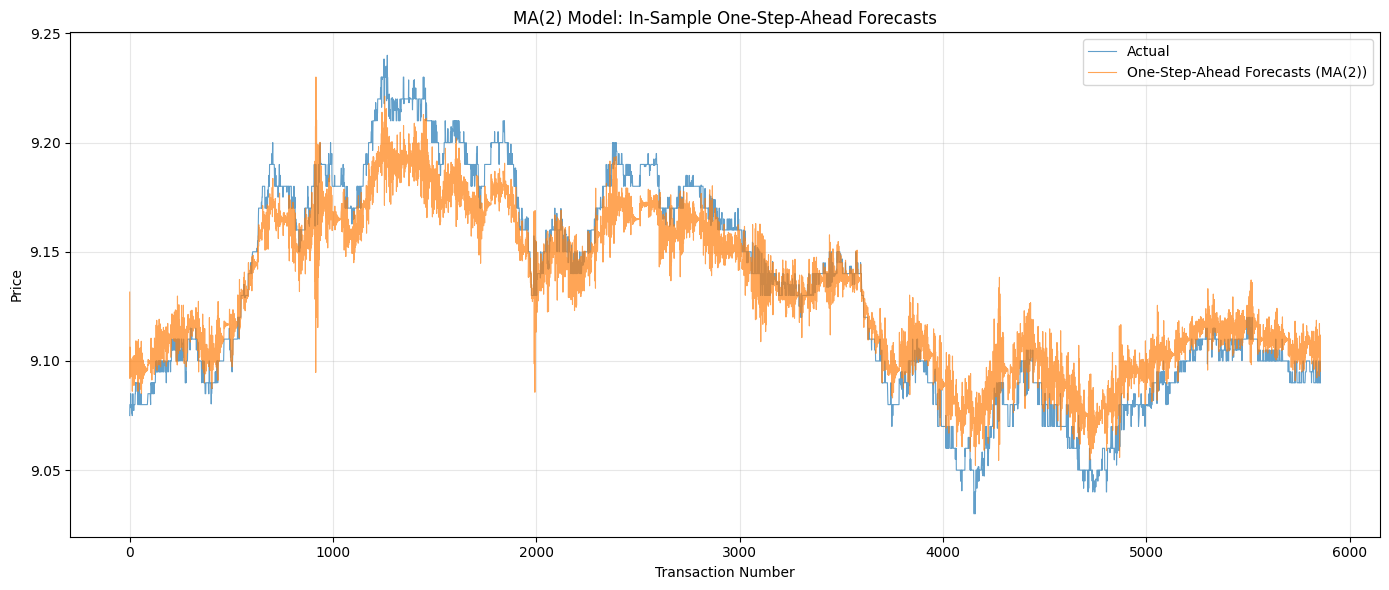

In [14]:
# In-sample one-step-ahead forecasts using MA(2) model
# The fitted values are the one-step-ahead forecasts

# Get one-step-ahead forecasts (fitted values)
forecasts = ma2_model.fittedvalues
actual = price_data

# Plot
plt.figure(figsize=(14, 6))
plt.plot(actual.index, actual.values, label='Actual', alpha=0.7, linewidth=0.8)
plt.plot(forecasts.index, forecasts.values, label='One-Step-Ahead Forecasts (MA(2))', alpha=0.7, linewidth=0.8)
plt.xlabel('Transaction Number')
plt.ylabel('Price')
plt.title('MA(2) Model: In-Sample One-Step-Ahead Forecasts')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()